# Data Visualizations


### Import libraries

In [1]:
import numpy as np
import pandas as pd
import mlxtend

from matplotlib import pyplot as plt
from mlxtend.plotting import scatterplotmatrix
from mlxtend.plotting import heatmap


### Read CSV file containing YouTube video data

In [2]:
# Read CSV file
yt_data = pd.read_csv('../data/youtube_video_data.csv')

# Drop the CSV file's numeric row count/index column
yt_data = yt_data.drop('Unnamed: 0', axis=1)

# Convert 2 date columns into datetime objects
yt_data['video_published_at'] = pd.to_datetime(yt_data['video_published_at'])
yt_data['channel_published_at'] = pd.to_datetime(yt_data['channel_published_at'])

# Output the dataframe
yt_data

,video_id,title,description,video_published_at,hours_published_video,num_tags,channel,channel_id,thumbnail_url,thumbnail_width,...,views,likes,favorites,comments,channel_description,channel_published_at,days_published_channel,channel_views,channel_videos,channel_subscribers
0,x_t53a5Ons0,Metallica: If Darkness Had a Son (Official Mus...,Metallica's official music video for “If Darkn...,2023-03-01 15:00:43+00:00,14.864821,8,Metallica,UCbulh9WdLtEXiooRcYK7SWw,https://i.ytimg.com/vi/x_t53a5Ons0/default.jpg,120,...,1190584,104266.0,0,11027.0,The Official Metallica YouTube Channel,2007-01-30 00:12:55+00:00,5875.236114,5029599596,1819,9460000
1,WM8bTdBs-cw,Metallica: One (Official Music Video),"Metallica's official music video for “One,” fr...",2009-10-27 01:53:30+00:00,116979.985099,7,Metallica,UCbulh9WdLtEXiooRcYK7SWw,https://i.ytimg.com/vi/WM8bTdBs-cw/default.jpg,120,...,279959343,1691453.0,0,76073.0,The Official Metallica YouTube Channel,2007-01-30 00:12:55+00:00,5875.236114,5029599596,1819,9460000
2,qz8yjPTMJf4,Metallica: Screaming Suicide (Official Lyric V...,"Metallica’s official lyric video, “Screaming S...",2023-01-25 14:01:00+00:00,855.860099,8,Metallica,UCbulh9WdLtEXiooRcYK7SWw,https://i.ytimg.com/vi/qz8yjPTMJf4/default.jpg,120,...,278112,12501.0,0,876.0,The Official Metallica YouTube Channel,2007-01-30 00:12:55+00:00,5875.236114,5029599596,1819,9460000
3,_u-7rWKnVVo,Metallica: Lux Æterna (Official Music Video),Metallica's official music video for “Lux Æter...,2022-11-28 15:00:20+00:00,2246.871210,8,Metallica,UCbulh9WdLtEXiooRcYK7SWw,https://i.ytimg.com/vi/_u-7rWKnVVo/default.jpg,120,...,15976078,483175.0,0,46518.0,The Official Metallica YouTube Channel,2007-01-30 00:12:55+00:00,5875.236114,5029599596,1819,9460000
4,CD-E-LDc384,Metallica: Enter Sandman (Official Music Video),Metallica's official music video for “Enter Sa...,2012-03-19 20:34:06+00:00,95985.308432,7,Metallica,UCbulh9WdLtEXiooRcYK7SWw,https://i.ytimg.com/vi/CD-E-LDc384/default.jpg,120,...,578225232,2857927.0,0,81851.0,The Official Metallica YouTube Channel,2007-01-30 00:12:55+00:00,5875.236114,5029599596,1819,9460000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,UKqkb4cEy-E,Miquella and Malenia: The Full Story | Elden R...,Of all the twins in Elden Ring (which there is...,2022-12-21 15:05:01+00:00,1694.793154,5,V-Limit,UCAXzwpv-8zX3uI95W7YfGYA,https://i.ytimg.com/vi/UKqkb4cEy-E/default.jpg,120,...,207776,8620.0,0,462.0,Explaining lore and solving mysteries in gamin...,2022-03-16 02:18:28+00:00,351.148926,4894758,19,33900
1270,_Pd5weoBjcE,Can I Beat Elden Ring While Getting Hit By Eve...,Thanks to Keeps for sponsoring - Head to https...,2022-11-05 09:57:21+00:00,2803.920932,0,Bushy,UCF5RrlbsxJjAVLWgOCoNHMg,https://i.ytimg.com/vi/_Pd5weoBjcE/default.jpg,120,...,1963328,46974.0,0,2370.0,NaN,2022-01-13 23:41:15+00:00,412.258104,33914550,39,241000
1271,hX7xcxpxHhU,Can I Beat Elden Ring by 1 Shotting the Bosses?,Enjoy!\n\n------------------------------------...,2022-05-16 14:00:18+00:00,6951.871765,1,Bushy,UCF5RrlbsxJjAVLWgOCoNHMg,https://i.ytimg.com/vi/hX7xcxpxHhU/default.jpg,120,...,5840506,124835.0,0,3366.0,NaN,2022-01-13 23:41:15+00:00,412.258104,33914550,39,241000
1272,m4YZcEc1qgI,Elden Ring Lore | Morgott: His Story,The Lore of Morgott in Elden Ring is a tale fo...,2023-02-10 21:03:57+00:00,464.810932,19,Hawkshaw,UC47GDLUPXADaa69O2AqJQ9A,https://i.ytimg.com/vi/m4YZcEc1qgI/default.jpg,120,...,61256,3828.0,0,338.0,"Welcome to Hawkshaw, a channel for going in de...",2015-10-28 14:32:24+00:00,2681.639250,8515004,28,78700


### Describe the dataframe

In [3]:
print("Shape: ", yt_data.shape, "\n")
yt_data.describe()

Shape:  (1274, 24) 



,hours_published_video,num_tags,thumbnail_width,thumbnail_height,duration,views,likes,favorites,comments,days_published_channel,channel_views,channel_videos,channel_subscribers
count,1274.000000,1274.000000,1274.0,1274.0,1274.000000,1.274000e+03,1.271000e+03,1274.0,1266.000000,1274.000000,1.274000e+03,1274.000000,1.274000e+03
mean,6068.009250,16.653846,120.0,90.0,1189.474097,6.031095e+06,8.459805e+04,0.0,4270.718009,3132.719073,1.919969e+09,2261.682104,5.015398e+06
std,12981.101093,13.543980,0.0,0.0,1902.158400,3.411884e+07,2.502717e+05,0.0,10001.176001,1806.968106,4.039485e+09,7003.176064,9.831193e+06
min,0.875099,0.000000,120.0,90.0,0.000000,7.000000e+00,0.000000e+00,0.0,0.000000,9.119690,5.320000e+02,1.000000,1.000000e+01
25%,73.789265,3.000000,120.0,90.0,399.000000,1.355218e+05,5.029000e+03,0.0,363.000000,1644.449030,5.373842e+07,139.000000,3.055000e+05
50%,1010.603293,16.000000,120.0,90.0,759.500000,7.039905e+05,2.141400e+04,0.0,1302.000000,2978.274852,4.654926e+08,335.500000,1.590000e+06
75%,5506.223710,27.000000,120.0,90.0,1391.000000,2.750673e+06,7.147100e+04,0.0,3996.250000,4216.257500,1.534410e+09,1134.750000,5.960000e+06
max,116979.985099,74.000000,120.0,90.0,43724.000000,5.816827e+08,3.725167e+06,0.0,146048.000000,6375.429748,2.930093e+10,112462.000000,1.360000e+08


### Histogram of Views

Text(0, 0.5, '# of Videos')

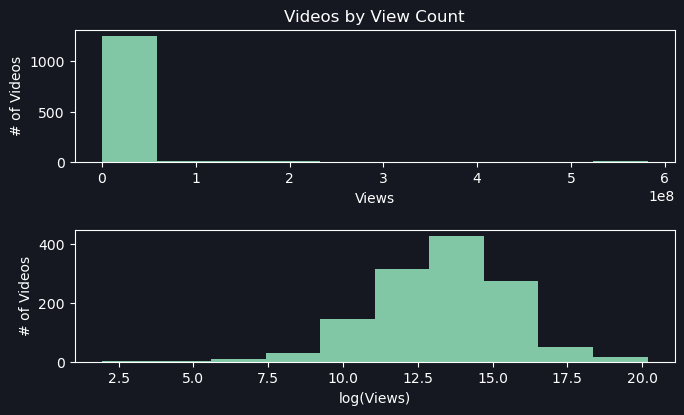

In [4]:
bgcolor = "#151821"
fgcolor = "#ffffff"
barcolor = "#82C7A5"
edgecolor = "#0000ff"

fig = plt.figure(figsize=(6,4), facecolor=bgcolor)

ax = fig.add_axes([0,0.5,1,0.33])
ax.patch.set_facecolor(bgcolor)
ax.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax.spines.values():
    spine.set_edgecolor(fgcolor)    
ax.hist(x=yt_data['views'], facecolor=barcolor)
ax.set_title('Videos by View Count', color=fgcolor)
ax.set_xlabel('Views', color=fgcolor)
ax.set_ylabel('# of Videos', color=fgcolor)

ax = fig.add_axes([0,0,1,0.33])
ax.patch.set_facecolor(bgcolor)
ax.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax.spines.values():
    spine.set_edgecolor(fgcolor)    
ax.hist(x=np.log(yt_data['views']), facecolor=barcolor)
ax.set_xlabel('log(Views)', color=fgcolor)
ax.set_ylabel('# of Videos', color=fgcolor)


### Perform some data transformations

In [79]:
pd.set_option('mode.chained_assignment', None)

yt_data['log_views'] = np.log(yt_data['views'])

yt_data['duration'] = yt_data['duration'].replace(0, np.nan)
yt_data['log_duration'] = np.log(yt_data['duration'])

yt_data['likes'] = yt_data['likes'].replace(0, np.nan)
yt_data['log_likes'] = np.log(yt_data['likes'])

yt_data['comments'] = yt_data['comments'].replace(0, np.nan)
yt_data['log_comments'] = np.log(yt_data['comments'])

yt_data['log_hrs_publ_vid'] = np.log(yt_data['hours_published_video'])
yt_data['log_days_publ_chn'] = np.log(yt_data['days_published_channel'])
yt_data['log_channel_views'] = np.log(yt_data['channel_views'])
yt_data['log_channel_subscribers'] = np.log(yt_data['channel_subscribers'])


### Produce a Scatterplot Matrix

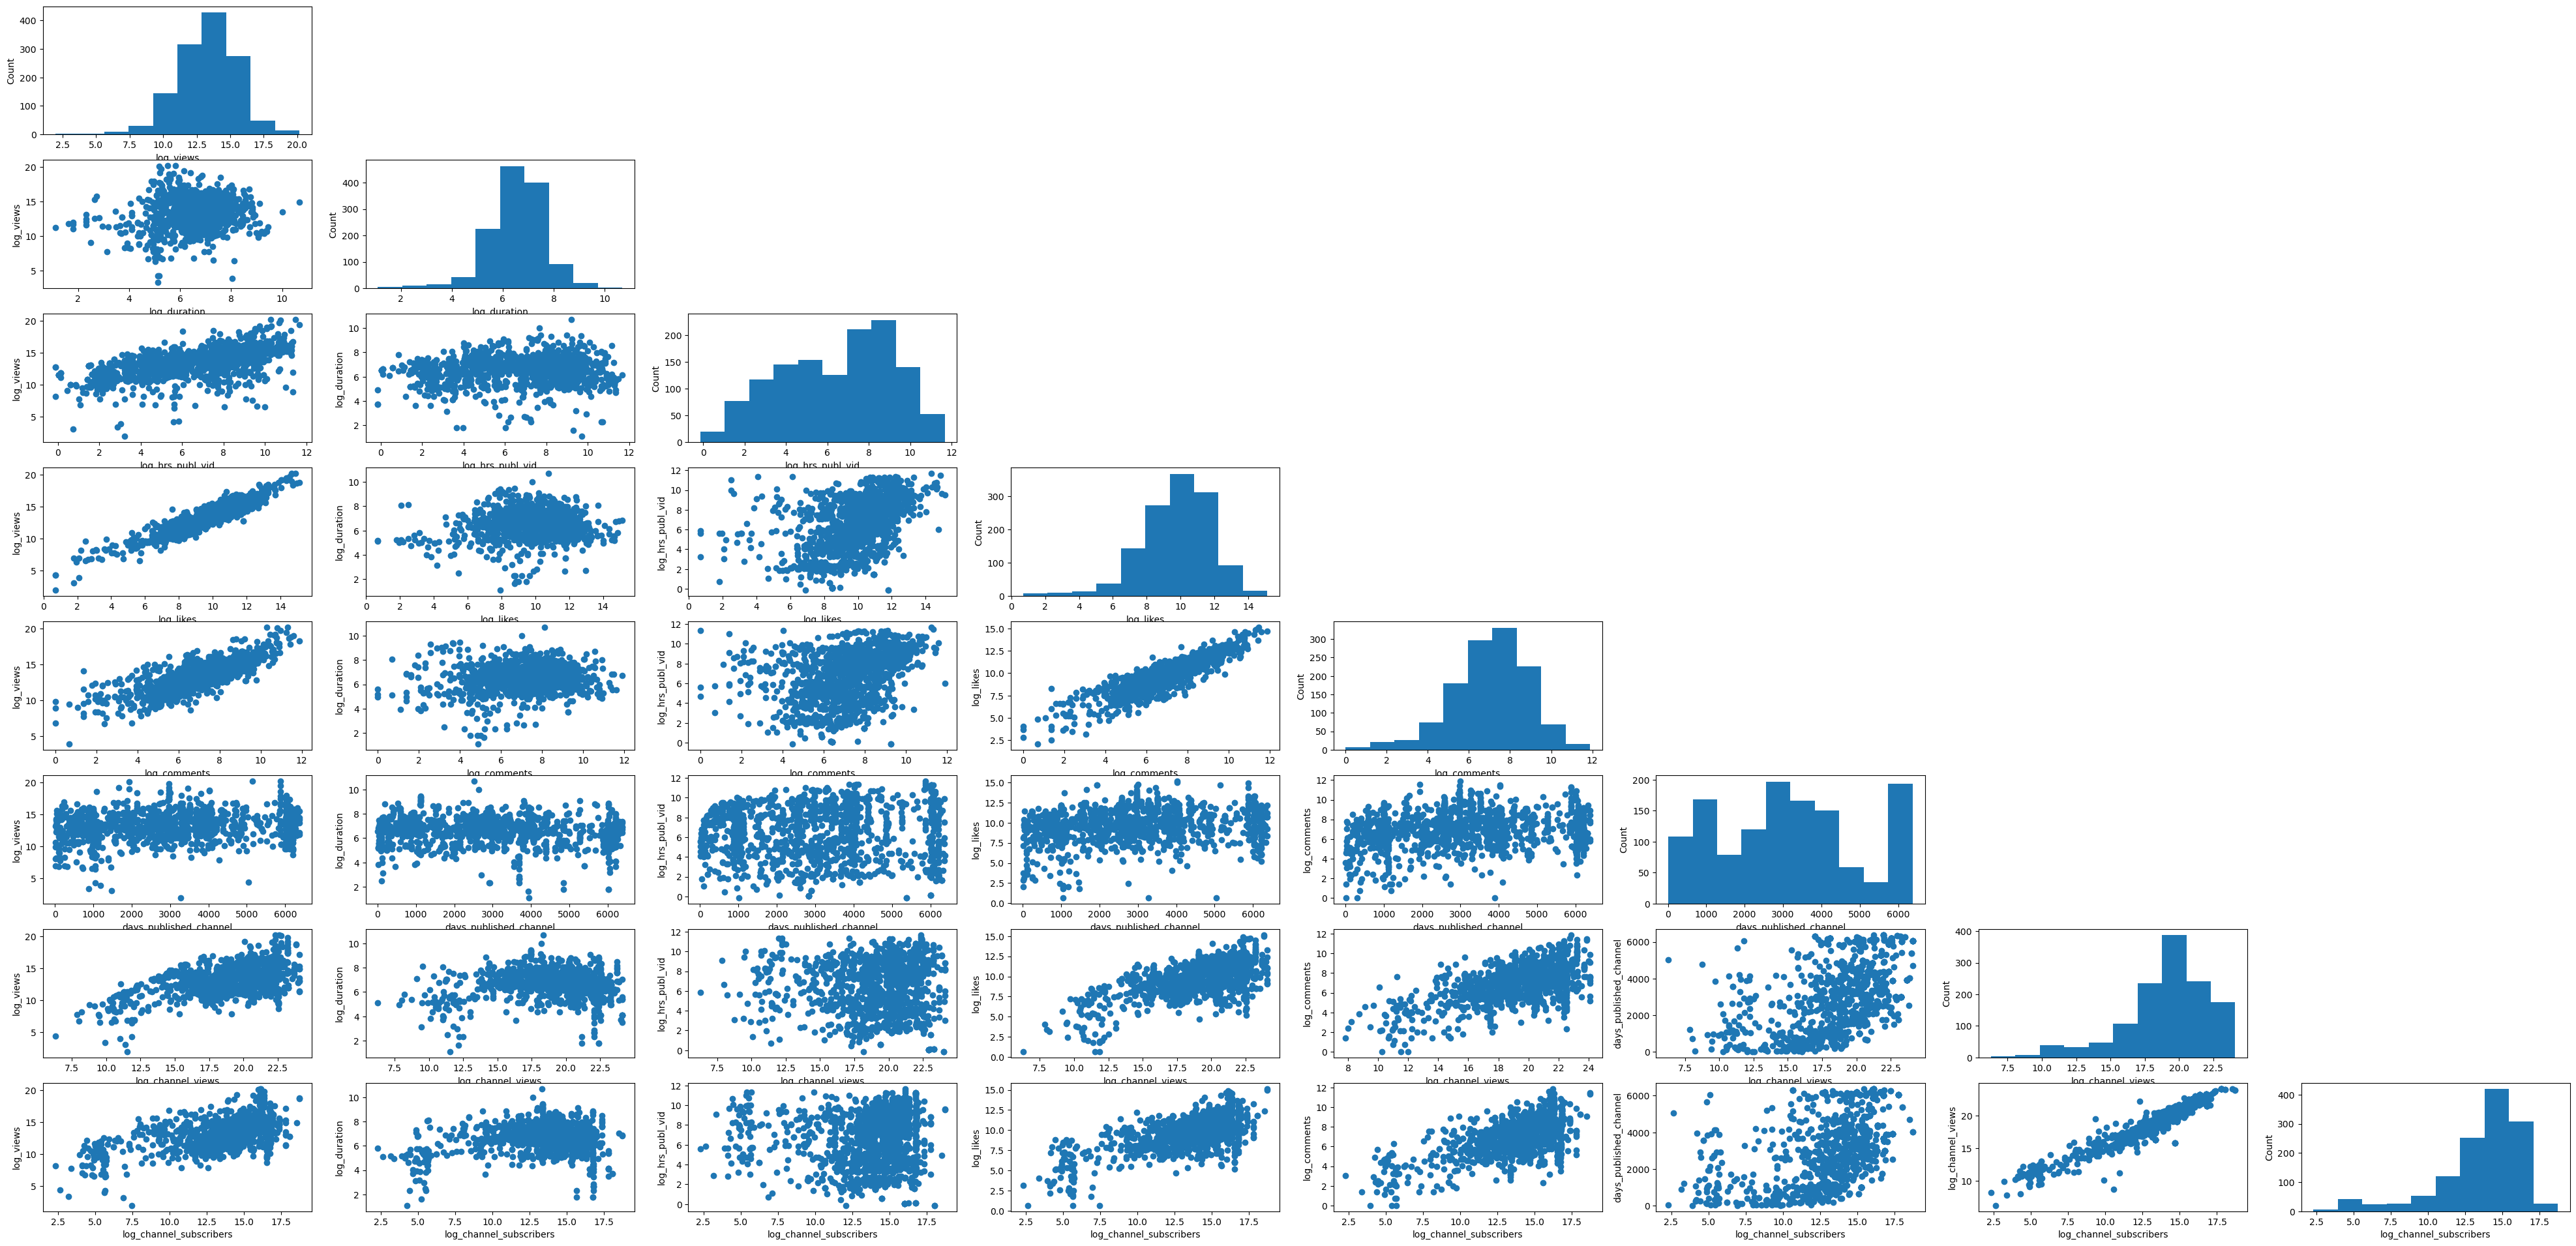

In [80]:
variables = ['log_views', 'log_duration', 'log_hrs_publ_vid', 'log_likes', 'log_comments', 
             'days_published_channel', 'log_channel_views', 'log_channel_subscribers']

scatterplotmatrix(
    yt_data[variables].values,
    names=variables,
    figsize=(50,24), alpha=1
);


### Produce a Correlation Matrix Heatmap

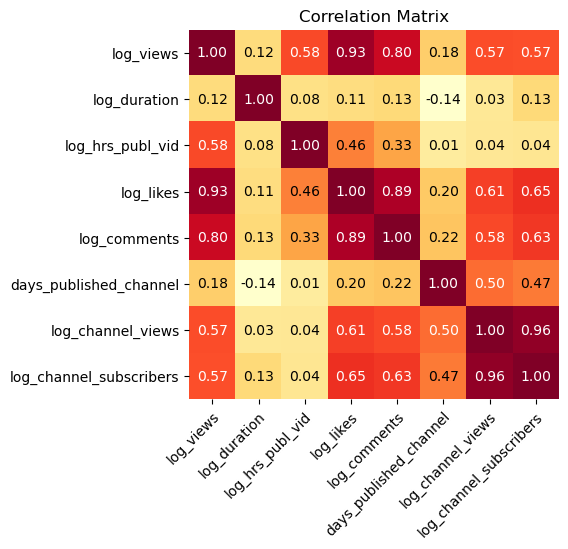

In [96]:
cm = yt_data[variables].corr().values
(fig, ax) = heatmap(cm, row_names=variables, column_names=variables, 
                    cmap="YlOrRd", hide_spines=True, colorbar=False)

ax = ax.set_title("Correlation Matrix")

### Produce some scatterplots (for presentation)

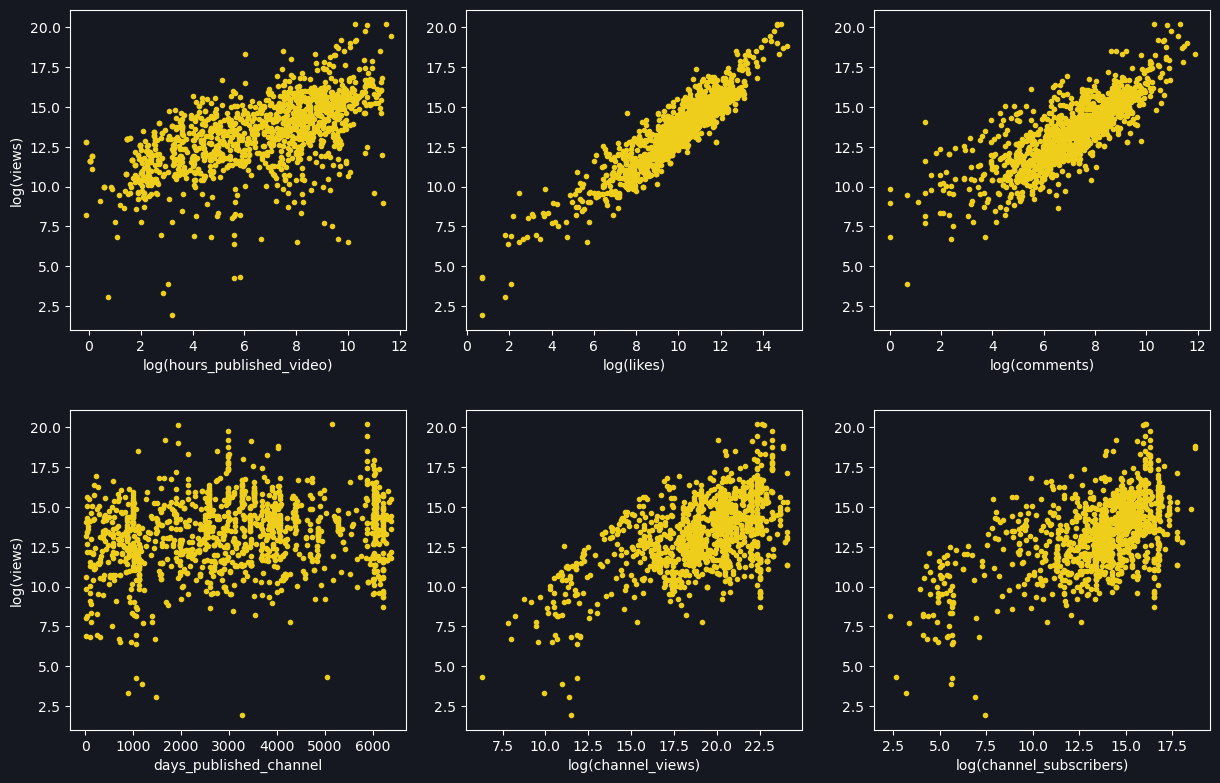

In [74]:
pointcolor = "#eece1a"
fig = plt.figure(figsize=(12,8), facecolor=bgcolor)

ax1 = fig.add_axes([0,0.9,0.28,0.40])
ax1.patch.set_facecolor(bgcolor)
ax1.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax1.spines.values():
    spine.set_edgecolor(fgcolor)    
ax1.scatter(y=yt_data['log_views'], x=yt_data['log_hrs_publ_vid'], marker=".", facecolor=pointcolor)
ax1.set_xlabel('log(hours_published_video)', color=fgcolor)
ax1.set_ylabel('log(views)', color=fgcolor)

ax2 = fig.add_axes([0.33,0.9,0.28,0.40])
ax2.patch.set_facecolor(bgcolor)
ax2.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax2.spines.values():
    spine.set_edgecolor(fgcolor)    
ax2.scatter(y=yt_data['log_views'], x=yt_data['log_likes'], marker=".", facecolor=pointcolor)
ax2.set_xlabel('log(likes)', color=fgcolor)
ax2.sharey(ax1)

ax3 = fig.add_axes([0.67,0.9,0.28,0.40])
ax3.patch.set_facecolor(bgcolor)
ax3.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax3.spines.values():
    spine.set_edgecolor(fgcolor)    
ax3.scatter(y=yt_data['log_views'], x=yt_data['log_comments'], marker=".", facecolor=pointcolor)
ax3.set_xlabel('log(comments)', color=fgcolor)
ax3.sharey(ax1)

ax4 = fig.add_axes([0,0.4,0.28,0.4])
ax4.patch.set_facecolor(bgcolor)
ax4.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax4.spines.values():
    spine.set_edgecolor(fgcolor)    
ax4.scatter(y=yt_data['log_views'], x=yt_data['days_published_channel'], marker=".", facecolor=pointcolor)
ax4.set_xlabel('days_published_channel', color=fgcolor)
ax4.set_ylabel('log(views)', color=fgcolor)

ax5 = fig.add_axes([0.33,0.4,0.28,0.4])
ax5.patch.set_facecolor(bgcolor)
ax5.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax5.spines.values():
    spine.set_edgecolor(fgcolor)    
ax5.scatter(y=yt_data['log_views'], x=yt_data['log_channel_views'], marker=".", facecolor=pointcolor)
ax5.set_xlabel('log(channel_views)', color=fgcolor)
ax5.sharey(ax4)

ax6 = fig.add_axes([0.67,0.4,0.28,0.4])
ax6.patch.set_facecolor(bgcolor)
ax6.tick_params(color=fgcolor, labelcolor=fgcolor)
for spine in ax6.spines.values():
    spine.set_edgecolor(fgcolor)    
ax6.scatter(y=yt_data['log_views'], x=yt_data['log_channel_subscribers'], marker=".", facecolor=pointcolor)
ax6.set_xlabel('log(channel_subscribers)', color=fgcolor)
ax6.sharey(ax4)